# Пробный анализ ошибки в задаче MNIST
Рассчитано среднее значение ошибки и стандартное отклонение на обучении и контроле.

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

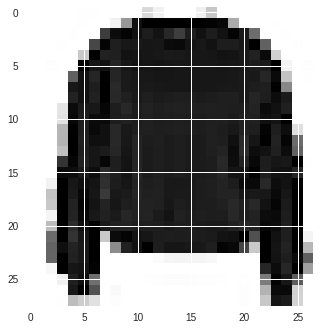

In [111]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check successful loading
plt.imshow(X_train[7])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [0]:
# Samples quantity
n_samples = 1000

# Components amount
n_comp = np.array([3, 5, 7, 12, 18, 25, 33, 40, 48, 55])

# Number of iterations for measuring average and std
iter_count = 8

In [0]:
def get_rest_indices(ind, size):
    """
    Returns indices in range of 'size' besides 'ind'
    """
    temp_arr = np.zeros(size, dtype="int32")
    temp_arr[ind] = ind
    new_ind = np.arange(size) - temp_arr
    
    return new_ind

In [110]:
lr = LogisticRegression()

# Data containers for future graphics drawing
train_temp_dict = {}
control_temp_dict = {}

for amount in n_comp:
    pca = PCA(n_components=amount)
    
    # Temporary arrays for mean and std measuring
    current_accuracy_train = np.zeros(iter_count)
    current_accuracy_control = np.zeros(iter_count)
    
    print(f"Computing for {amount} components...", end='')
    
    for idx in range(iter_count):
        # Divide sample on train and control randomly without replacing
        used_indices_train = np.random.choice(np.arange(X_train.shape[0]),
                                              n_samples, replace=False)
        rest_indices = get_rest_indices(used_indices_train, X_train.shape[0])
        used_indices_control = np.random.choice(np.arange(X_train.shape[0])[rest_indices],
                                                n_samples, replace=False)
        
        # Applying PCA decomposition
        X_train_chosen = pca.fit_transform(X_train[used_indices_train].reshape([-1, 784]))
        X_control_chosen = pca.transform(X_train[used_indices_control].reshape([-1, 784]))
        
        lr.fit(X_train_chosen, y_train[used_indices_train])
        
        current_accuracy_train[idx] = accuracy_score(y_train[used_indices_train],
                                                     lr.predict(X_train_chosen))
        current_accuracy_control[idx] = accuracy_score(y_train[used_indices_control],
                                                       lr.predict(X_control_chosen))
    print("Done")
    
    train_temp_dict[amount] = [current_accuracy_train.mean(),
                               current_accuracy_train.std()]
    control_temp_dict[amount] = [current_accuracy_control.mean(),
                                 current_accuracy_control.std()]

Computing for 3 components...Done
Computing for 5 components...Done
Computing for 7 components...Done
Computing for 12 components...Done
Computing for 18 components...Done
Computing for 25 components...Done
Computing for 33 components...Done
Computing for 40 components...Done
Computing for 48 components...Done
Computing for 55 components...Done


Комментарий: больше нет проблемы с длительностью вычислений, как в ДЗ №2 $-$ помог colab

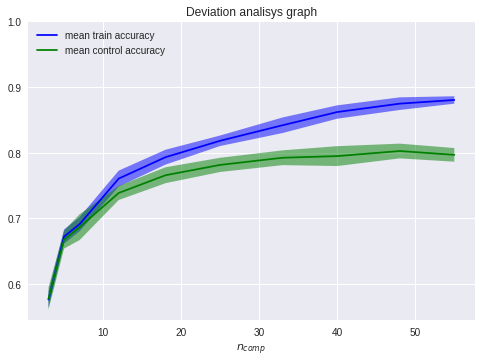

In [114]:
fig, ax = plt.subplots(1)

train_array = np.array([mean for mean in train_temp_dict.values()])
mu_train = train_array[:, 0]
sigma_train = train_array[:, 1]

control_array = np.array([mean for mean in control_temp_dict.values()])
mu_control = control_array[:, 0]
sigma_control = control_array[:, 1]

ax.plot(n_comp, mu_train, 'b', label='mean train accuracy')
ax.plot(n_comp, mu_control, 'g', label='mean control accuracy')
ax.fill_between(n_comp, mu_train+sigma_train, mu_train-sigma_train,
               facecolor='blue', alpha=0.5)
ax.fill_between(n_comp, mu_control+sigma_control, mu_control-sigma_control,
               facecolor='green', alpha=0.5)
ax.set_title(r"Deviation analisys graph")
ax.set_xlabel(r"$n_{comp}$")
ax.set_ylim(top=1)
ax.legend(loc='upper left')

Комментарий: данное решение также является улучшенной версией ДЗ №2